In [48]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [49]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [50]:
# after extracting the NOAA in-situ measurements
# plot the locations of measurements

In [51]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
file1 = open(file_dir + 'filenames_2018', 'r')
lines = file1.readlines()

In [52]:
nm_loc = len(lines) # number of locations
loc_dict = []

for ifile in range(nm_loc):
    filename = lines[ifile].strip()
    ds = xr.open_dataset(file_dir + filename)
    code = ds.attrs['site_code']
    lon = ds.attrs['site_longitude']
    lat = ds.attrs['site_latitude']
    loc_dict.append((code,lon,lat))

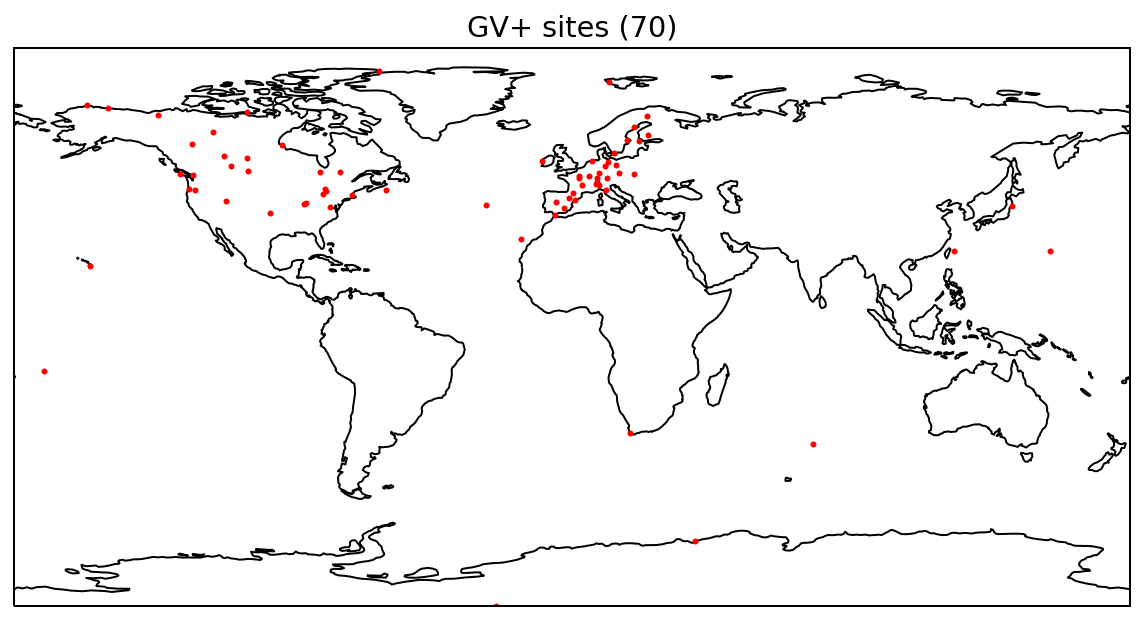

In [53]:
# plot after mapping
fig = plt.figure(figsize=[10, 7])
proj=ccrs.PlateCarree()

ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((-180.0, 180.0, -90., 90.0))

for name, lon, lat in loc_dict:
    plt.plot(lon, lat, marker='.', markersize=6.0, markeredgewidth=0,
                 markerfacecolor='red')

ax.set_title('GV+ sites (' + str(nm_loc) + ')');

fig.savefig(file_dir + 'noaa_locations_global.png', dpi=300)

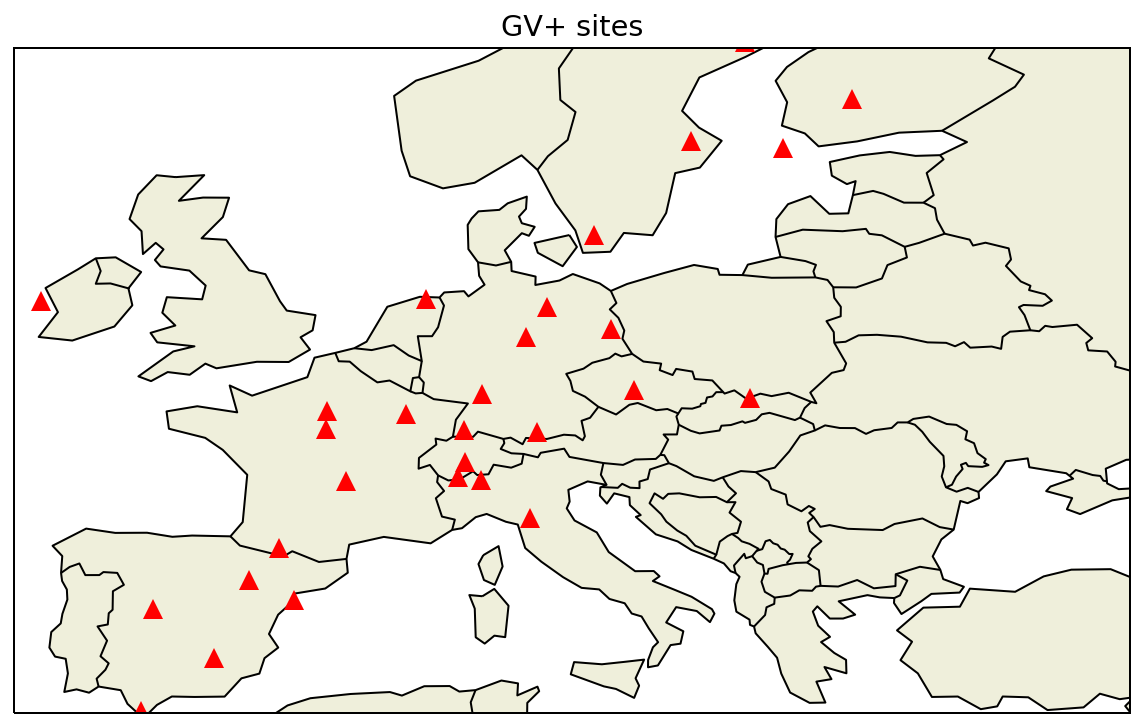

In [54]:
# plot after mapping
fig = plt.figure(figsize=[10, 7])
proj=ccrs.PlateCarree()

ax = plt.axes(projection=proj)
#ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

ax.set_extent((-180.0, 180.0, -90., 90.0))
ax.set_xlim(-11,36)
ax.set_ylim(36,64)

for name, lon, lat in loc_dict:
    plt.plot(lon, lat, marker='^', markersize=10, markeredgewidth=0,
                 markerfacecolor='red')

ax.set_title('GV+ sites');

fig.savefig(file_dir + 'noaa_locations_eu.png', dpi=300)

In [55]:
lat_res = 5    # horizontal resolution of lat
lat_grid = np.linspace(-90, 90, int(180/lat_res + 1)) # grid center
count = np.zeros(len(lat_grid)) # store counts here
lat_grid

array([-90., -85., -80., -75., -70., -65., -60., -55., -50., -45., -40.,
       -35., -30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,
        20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
        75.,  80.,  85.,  90.])

In [56]:
file1 = open(file_dir + 'filenames', 'r')
lines = file1.readlines()
nm_loc = len(lines) # number of locations

for ifile in range(nm_loc):
    filename = lines[ifile].strip()
    ds = xr.open_dataset(file_dir + filename)

    tmp = ds.where(ds['co2'] > 0, drop = True)
    nm = len(tmp['co2'])
    
    lat = ds.attrs['site_latitude']

    for ilat in range(len(lat_grid)):
        if lat >= lat_grid[ilat]-0.5*lat_res and lat <= lat_grid[ilat]+0.5*lat_res:
            count[ilat] = count[ilat] + nm

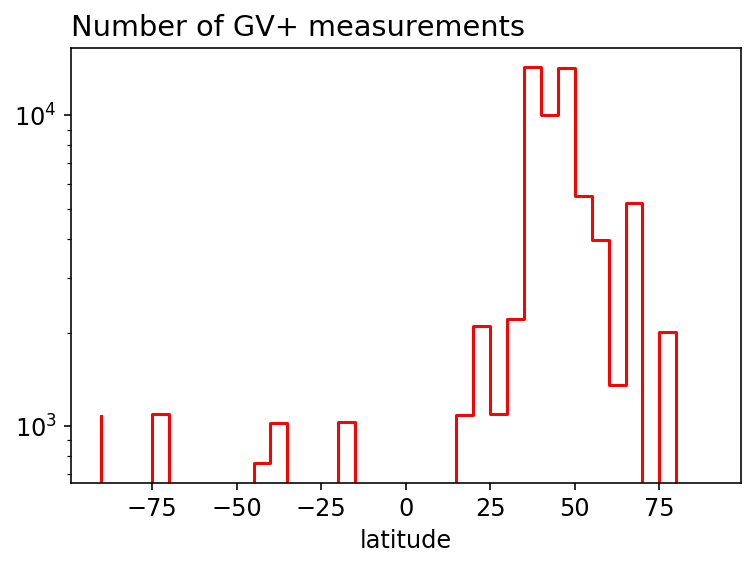

In [65]:
fig = plt.figure(figsize=[6,4])

plt.plot(lat_grid, count, linestyle='-', c='r', drawstyle='steps')

plt.title('Number of GV+ measurements', loc = 'left')
plt.xlabel('latitude')
#plt.ylim(bottom = 1, top = 100000)
plt.yscale('log')
fig.savefig(file_dir + 'noaa_count.png', dpi=300)
